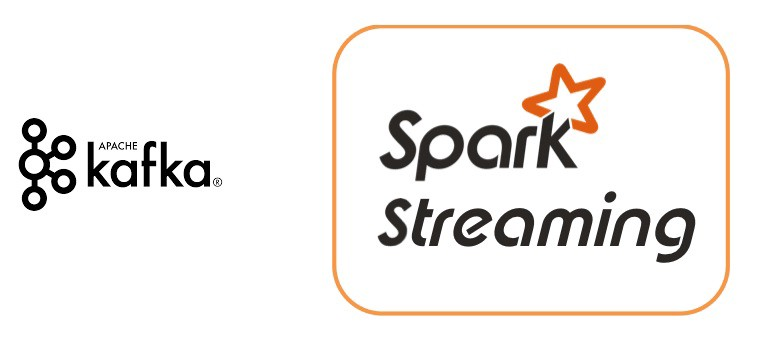

# **Arquitectura**

Instalamos la biblioteca [kafka-python](https://kafka-python.readthedocs.io/en/master/). 

In [1]:
!pip install kafka-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 246 kB 639 kB/s 


Instalamos la biblioteca [sseclient](https://pypi.org/project/sseclient/).

In [2]:
!pip install sseclient

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sseclient: filename=sseclient-0.0.27-py3-none-any.whl size=5584 sha256=a3e9ce4bdb8270fa3a1de7573a342b0d7d2781ffa17fcba738b5f18a0f213f8c
  Stored in directory: /root/.cache/pip/wheels/07/67/7e/96edf627ac746de1a5c5cbb8d59ed960f033b8352dc12c545d
Successfully built sseclient


Usamos sseclient para conectarnos al [web service de Wikipedia](https://wikitech.wikimedia.org/wiki/Event_Platform/EventStreams#Python) y testear la recuperación de datos.

In [3]:
import json
from sseclient import SSEClient as EventSource
i = 0

url = 'https://stream.wikimedia.org/v2/stream/recentchange'
for event in EventSource(url):
    i = i+1 # fragmento agregado para frenar la produccion en 1000
    if i > 1000: #
      break #
    if event.event == 'message':
        try:
            change = json.loads(event.data)
        except ValueError:
            pass
        else:
            print('{user} edited {title}'.format(**change))

RoesslerP edited Q112066473
Bitbotje edited Categorie:Paratriarius
Umarbot edited Ильински (Головинскан йуьртан меттиг)
SecretName101 edited File:Anti-Trump ANSWER march and rally (32167476501).jpg
Bitbotje edited Categorie:Bladkevers
SecretName101 edited File:Anti-Trump ANSWER march and rally (31476719213).jpg
SecretName101 edited File:Anti-Trump protesters take to Chicago streets -notmypresident.webm
GiantSnowman edited Category:Noindexed pages
GiantSnowman edited Category:Biography articles of living people
RoesslerP edited Q112066473
GiantSnowman edited Category:Unassessed biography articles
Nashona edited Q2477035
GiantSnowman edited Category:Biography articles without listas parameter
InternetArchiveBot edited Kategorio:Webarchive template wayback links
GiantSnowman edited Category:WikiProject Biography articles
NikkiBot edited File:LL-Q150 (fra)-DenisdeShawi-morsures.wav
Cewbot edited Q39993403
Cewbot edited Q39993403
46.32.66.206 edited Список императоров России
Emmridet edited

In [4]:
type(change)

dict

Los atributos de cada mensaje:

In [5]:
for k in change.keys():
  print(k)

$schema
meta
id
type
namespace
title
comment
timestamp
user
bot
minor
patrolled
length
revision
server_url
server_name
server_script_path
wiki
parsedcomment


Mostramos el contenido de algunos campos del último mensaje recibido:

In [6]:
print("User: %s, Title: %s, Bot: %s" % (change["user"],change["title"],change["bot"]))

User: PatriHorrillo, Title: Q108434641, Bot: False


Nos conectamos nuevamente a Wikipedia y enviamos los datos a Kafka.

In [7]:
import time
import json
from sseclient import SSEClient as EventSource
import kafka
from kafka import KafkaProducer,KafkaConsumer,KafkaAdminClient,KafkaClient
from kafka.errors import KafkaError
from random import *
import pandas as pd

In [8]:
producer = KafkaProducer(bootstrap_servers=['ec2-18-118-112-10.us-east-2.compute.amazonaws.com'])

In [9]:
print(KafkaClient(bootstrap_servers=['ec2-18-118-112-10.us-east-2.compute.amazonaws.com']).check_version())

(2, 3, 0)


In [10]:
admin_client = kafka.KafkaAdminClient(bootstrap_servers=['ec2-18-118-112-10.us-east-2.compute.amazonaws.com'])
L = admin_client.list_topics()
print(L)

['G2-grupo5', 'G2-alarmas4-1', 'G2-alarmas4', 'Images3', 'G2-grupo1', 'G3-grupo5', 'grupo1', 'fotos', 'Sales', 'G3-grupo5-test', 'alarmas', 'diplomado', 'Images2', 'G3-grupo5-test2', 'G3-grupo1', 'grupo4', 'G2-grupo4', 'diplomaddas', 'G2-alarmas1', 'G3-grupo4', 'G2-alarmas3', 'G2-grupo2G2', 'CSV', 'G2-2', 'grupo5', '__consumer_offsets', 'G3-grupoX', 'G2-grupo3', 'G2-alarmas2', 'G2-Grupo3', 'grupo6', 'XXXX', 'G2-grupo7', 'G3-grupo3', 'G3', 'G2-alarmas6', 'grupo2', 'G3-grupo7', 'RUL_25', 'G2-alarmas', 'G2-alarmas5', 'wiki', 'RUL', 'grupo7', 'G2-g1_alarmas_test', 'G2-grupo2', 'images', 'G1-grupo5', 'grupo3', 'Images22', 'G2-grupo6', 'G3-grupo6', 'G2-grupo4-1', 'wiki-7', 'G3-ALARMA', 'G3-grupo2', 'G2-alarma3', 'Images', 'Images_22']


In [13]:
url = 'https://stream.wikimedia.org/v2/stream/recentchange'
i = 0
for event in EventSource(url):
    # i = i+1 # fragmento agregado para frenar la produccion en 1000
    # if i > 1000: #
      # break #
    if event.event == 'message':
        try:
            change = json.loads(event.data)
        except ValueError:
            pass
        else:
            print('{user} edited {title}'.format(**change))
            #print(json.dumps(change).encode('utf-8'))
            producer.send('wiki',json.dumps(change).encode('utf-8'))

# Interrumpido para no continuar la produccion de datos.

Arpyia edited Q687851
Emijrpbot edited Q24652891
FlickreviewR 2 edited File:Superliga, Brasilia Vôlei vs. Balneário Camboriú (19.Dec.2018), 155.jpg
Cewbot edited Q39993458
Bogdanov-62 edited Категория:Родившиеся 25 июня
SchlurcherBot edited File:Karte Gemeinde Longás 2022.png
Emijrpbot edited Q15578882
AnomieBOT edited Category:Articles with unsourced statements from May 2022
AnomieBOT edited Category:Articles with unsourced statements
Aihotz edited Michael of Chernigov
FlickreviewR 2 edited Category:Flickr public domain images needing human review
FlickreviewR 2 edited Category:Flickr images reviewed by FlickreviewR 2
FlickreviewR 2 edited Category:Flickr review needed
Dthomsen8 edited Category:Low-importance Cleveland articles
Dthomsen8 edited Category:Unknown-importance Cleveland articles
Ira Leviton edited Category:CS1 maint: PMC format
Arpyia edited Q580739
SchlurcherBot edited File:ISS043-E-71722 - View of Earth.jpg
Dbastro edited Barzana
Daniel Mietchen edited Q91541777
Cewbot e

KeyboardInterrupt: ignored

In [12]:
# response = admin_client.delete_topics(['numbers'])